### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 

#### Temario:
* Imágenes digitales: tipos (binarias, monocromáticas y a color)**
* Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
* Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
* Clasificación de imágenes.
* Aprendizaje automático
* Aprendizaje profundo: Redes neuronales
* Aplicaciones: Grafos para segmentación de imágenes, entre otras.

#### Introducción:
Podemos definir una **imagen** como una función o arreglo bidimensional  f(x1,x2)  
donde  x=(x1,x2) son las coordenadas espaciales, y el valor de f en cualquier x es la intensidad de la imagen en dicho punto, si es en grises o binaria.

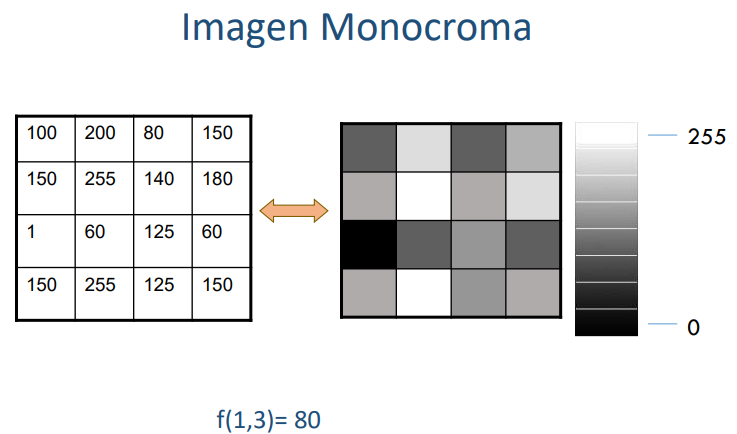

* El **tamaño de la imagen monocroma** es el número de filas por el número de columnas,  M×N. 
* Cada punto corresponde a un píxel. 
* El valor de la **intensidad** pertenece al intervalo [0 255]
* 0 corresponde al negro 
* 255 corresponde al blanco

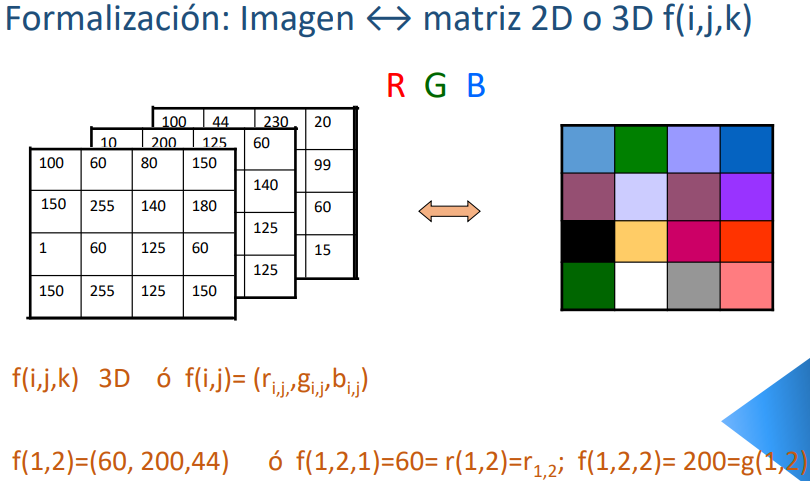

* El **tamaño de la imagen a color** es el número de filas por el número de columnas, por 3 (M×Nx3). Si es salelital: M×Nxk donde k es la cantidad de bandas (espectrales).
* Hay 3 valores de **intensidad** , uno por cada canal: R, G y B (red, green, blue).
* Si es imagen satelital hay tantos valores como bandas o canales tenga la imagen (depende de la cantidad de sensores).

## Resolución

**Resolución Espectral**: Dada por la cantidad de bandas o canales de la imagen (monocroma, RGB, hiperespectrales, etc)

**Resolución Espacial**: Asociada a la cantidad de pixeles también pero también se considera la representación espacial de cada pixel en la escena que está representando (escala). A modo de ejemplo, en imágenes satelitales: Sentinel tiene algunas bandas con resolución de 10 metros, es decir cada pixel representa una porción del terreno de 10mx10m;  en imágenes microscópicas pueden ser en micrómetros, asociadas al aumento (5x,10x, etc.).

**Resolución Radiométrica**: la cantidad de niveles de gris de cada banda, asociada al tipo de dato con que se guarda cada pixel o a la sensibilidad del sensor con que fue tomada la imagen.

## Imágenes en Python, librerías:

Hay varias librerías para el manejo de imágenes en Python, algunas tareas son compartidas aunque en general cada librería tiene su especialidad.

**PILLOW (Python Image Library)**: esta librería tiene un submódulo llamado "Image" que antes era independiente, por eso es necesario indicarlo. Python no importa automáticamente los submódulos. Esta librería también permite cargar la imagen en memoria y  manipular numéricamente los valores de intensidad. Para esto es necesario convertir la imagen en array con la librería numpy.

**SimpleITK**: SimpleITK es posiblemente una de las mejores biblioteca para tratar o procesar archivos DICOM y Nifti porque contiene todas las funciones requeridas para ambos formatos e incluso ofrece opciones que no se encuentran en otras bibliotecas de imágenes médicas, como convertir archivos Nifti en series DICOM. La librería SimpleITK también carga la imagen en memoria, y para manipularla tambiern se la debe convertir en araay pero con una función propia, en lugar de usar numpy como OpenCV. 

**OpenCV**: Uno de los usos más importantes de OpenCV en la visión por computadora es la detección de rostros y objetos, sobre todo en ámbitos como la fotografía, el marketing o la seguridad. La librería OpenCV lleva la imagen a memoria directamente como matriz. Su tipo es ndarray.

In [1]:
from PIL import Image 
# Cargar la imagen (de archivo) en memoria
lenna_color = Image.open('imagenes/lenna.jpg') 

print("El tamaño de la imagen es",lenna_color.size)
print("El modo de la imagen es", lenna_color.mode) 
print("El tipo de imagen es",lenna_color.format) 

El tamaño de la imagen es (512, 512)
El modo de la imagen es RGB
El tipo de imagen es JPEG


In [2]:
# Abrir la imagen original en una nueva ventana (función propia de PIL)
lenna_color.show() 

In [3]:
# Convertir el modo de la imagen, de color a escala de grises
lenna_gris = lenna_color.convert('L')

print("El tamaño de la imagen es",lenna_gris.size)
print("El modo de la imagen es", lenna_gris.mode) 
print("El tipo de imagen es",lenna_gris.format) #no veremos formato porque aun no hemos guardado esta imagen

El tamaño de la imagen es (512, 512)
El modo de la imagen es L
El tipo de imagen es None


In [4]:
# Abrir la imagen modificada en una nueva ventana (función propia de PIL)
lenna_gris.show() 

In [5]:
# Guardar la nueva imagen modificada (función propia de PIL)
lenna_gris.save('imagenes/lenna_gris.png') 

In [6]:
# Volvemos a cargar en memoria la imagend modificada desde la que acabamos de guardar
lenna_gris = Image.open('imagenes/lenna_gris.png') 
print("El tamaño de la imagen es",lenna_gris.size)
print("El modo de la imagen es", lenna_gris.mode) 
print("El tipo de imagen es",lenna_gris.format) # Ahora si observamos el formato de la imagen guardada

El tamaño de la imagen es (512, 512)
El modo de la imagen es L
El tipo de imagen es PNG


Como se dijo para poder manipular numéricamente los valores de intensidad es necesario usar la librería numpy. Para eso se debe convertir la imagen en un array.


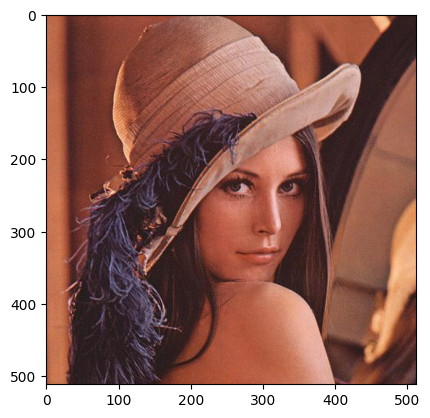

In [7]:
# Para manipular numericamente los valores de intensidad de la imagen, 
# debo convertirla a un array con la librería numpy.
from PIL import Image as img
import numpy as np 
from matplotlib.pyplot import imshow # para abrir la imagen en la misma notebook y no en una ventana separada

lenna_color = img.open('imagenes/lenna.jpg')
imshow(np.array(lenna_color)) 

In [8]:
# Transformar la imagen en array con numpy 
lenna_array = np.array(lenna_color,dtype=np.float32) # opcionalmente se puede fijar el tipo de dato

print("El tamaño de la imagen es",lenna_array.size)
print("Las dimensiones de la imagen son", lenna_array.shape) 
print("Tipo de datos del array: ", lenna_array.dtype)

El tamaño de la imagen es 786432
Las dimensiones de la imagen son (512, 512, 3)
Tipo de datos del array:  float32


In [11]:
# Se puede llevar nuevamente el array a imagen y grabarla
nueva_lenna=Image.fromarray(lenna_array.astype(np.uint8))
# Cuidado con la pérdida de datos por la compresión jpg
nueva_lenna.save('imagenes/nueva_lenna.jpg')

In [ ]:
#Para visualizar múltiples imágenes convertidas en array usamos matplotlib.pyplot
#Vamos a trabajar nuevamente con la imagen a color
#Si hemos limpiado la memoria, la volvemos a cargar

from PIL import Image
import numpy as np

I=Image.open('daisy.jpg')
I_array=np.array(I,dtype=np.float32)

import matplotlib.pyplot as plt
#En este caso importamos matplotlib.pyplot con el alias plt
#para mostrar la imagen se usará plt.imshow()

rojo=I_array[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo.shape)
plt.imshow(rojo, cmap='gray')
plt.title('componente rojo')
plt.show()

verde=I_array[:,:,1]
print("dimensiones de la componente verde (monocroma) =" , verde.shape)
plt.imshow(verde, cmap='gray')
plt.title('componente verde')
plt.show()

azul=I_array[:,:,2]
print("dimensiones de la componente roja (monocroma) =" , azul.shape)
plt.imshow(azul, cmap='gray')
plt.title('componente azul')
plt.show()


In [ ]:
plt.imshow(rojo)
plt.title('componente rojo en mapa de colores por defecto: viridis')
plt.colorbar()
plt.show()

**Cuando sea necesario**

**activar Kernel -> Restart & Clear Output**

**Considerando que hay que volver a importar las librerías necesarias****

### Generar imágenes con numpy y mostrarlas con matplotlib
#### Ejercicios

#### *Generar una cruz con fondo blanco de tamaño 192x192. Utilizar la función concatenar


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

negro=np.zeros((64,64))
blanco=negro+1

arriba=np.concatenate((blanco,negro,blanco),axis=1)

cruz=np.concatenate((arriba, np.zeros((64,192)),arriba),axis=0)

plt.imshow(cruz, cmap='gray')
plt.show()
print(cruz.shape)

In [ ]:
#Variante
import numpy as np
import matplotlib.pyplot as plt
cruz2=np.ones((192,192))
cruz2[:,64:129]=0
cruz2[64:129,:]=0
plt.imshow(cruz2, cmap='gray')
plt.show()
print(cruz2.shape)

#### Ejercicio: Invertir blanco y negro en la imagen anterior y mostrarla

#### Ejercicio: Generar un damero (tablero) con 24 cuadrados de 8x8 y mostrarlo

#### Ejercicio: Crear imagen monocroma (un solo canal, en grises) 64x64 con intensidad creciente

In [ ]:
#Creación con numpy
import numpy as np
arr_2D=np.zeros((64,64))
print(type(arr_2D[0,0]))
print(arr_2D)
c=np.arange(64)#/64
for i in c: 
    arr_2D[i,:]=c #en cada fila intensidad creciente numéricamente
    
print(arr_2D)
print("dimensiones",np.shape(c),"y", np.shape(arr_2D))

#Muestra con matplotlib varias imágenes juntas
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(arr_2D, cmap='gray')# ojo con la visualización de los datos si no fijamos rango [0,256]
axs[0].set_title("minimo(0) negro, máximo (63) blanco")
axs[1].imshow(arr_2D, cmap='gray',vmin=0 ,vmax=255) #ojo con la visualización de los datos
axs[1].set_title("0 negro, 255 blanco")
plt.show()
print('CUIDADO: Hay que estar atentos a la visualización de los datos')

In [ ]:
#El contador c puede no ser vector.
#Cambia ligeramente el for
#Creación con numpy
import numpy as np
arr_2D=np.empty((64,64))
print(type(arr_2D[0,0]))
print(arr_2D)

arr_2D[:] = np.nan
print(type(arr_2D[0,0]))
print(arr_2D)

c=range(64)#/64
for i in c: 
    arr_2D[i,:]=c[i] #en cada fila intensidad creciente numéricamente
    
print(arr_2D)
print("dimensiones",np.shape(c),"y", np.shape(arr_2D))

#Muestra con matplotlib
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(arr_2D, cmap='gray')# ojo con la visualización de los datos si no fijamos rango [0,256]
axs[0].set_title("minimo(0) negro, máximo (63) blanco")
axs[1].imshow(arr_2D, cmap='gray',vmin=0 ,vmax=255) #ojo con la visualización de los datos
axs[1].set_title("0 negro, 255 blanco")
plt.show()


#### Ejercicio: Construir y mostrar una imagen a colores 256x256 píxeles.
* **Ultimas 128 columnas color azul y **
* **Primeras 128 columnas, en todas las filas, rojo creciente y verde decreciente**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

arr_image=np.zeros((256,256,3),'uint8')
print(type(arr_image[0,0,0]))
c=np.arange(256) #debemos usar arange
#print(c)

#print(c[0:128])
for i in c[0:128]: #esta variable maneja las columnas primeras 128 columnas
    arr_image[:,i,0]=c #rojo creciente en las primeras 128 columnas
    arr_image[:,i,1]=(255-c) #verde decreciente en las primeras 128 columnas

arr_image[:,128:,2]=255 #(solo) azul en las últimas columnas

#Muestro filas 1, 127 y 128, 256, primera columna
print(arr_image[0,0,:])
print(arr_image[127,0,:])
print(arr_image[128,0,:])
print(arr_image[255,0,:])

print("R-rojo:")
print( arr_image[: ,:, 0])
print("G-verde:")
print( arr_image[:,:,1])
print("B-azul:")
print( arr_image[:,:,2])
plt.imshow(arr_image)

plt.show()

In [ ]:
#Utilizando lista en el contador
import matplotlib.pyplot as plt
import numpy as np
arr_image=np.zeros((256,256,3),'uint8')
print(type(arr_image[0,0,0]))
c=range(256)
#print(c)

for i in c:
    arr_image[i,0:128,0]=i #rojo creciente en las primeras 128 columnas
    arr_image[i,0:128,1]=(255-i) #verde decreciente en las primeras 128 columnas

arr_image[:,128:,2]=255 #(solo) azul en las últimas columnas

#Muestro filas 1, 127 y 128, 256, primera columna
print(arr_image[0,0,:])
print(arr_image[127,0,:])
print(arr_image[128,0,:])
print(arr_image[255,0,:])

print("R-rojo:")
print( arr_image[: ,:, 0])
print("G-verde:")
print( arr_image[:,:,1])
print("B-azul:")
print( arr_image[:,:,2])
plt.imshow(arr_image)

plt.show()

#### Ejercicio: Crear y mostrar una imagen 256x256, dividida en 4 cuadrados, cada uno de otro color.

### Librería SimpleITK
### Es otra librería para manipulación y procesado de imágenes es SimpleITK. Primero hay que instalarla (por única vez)¶

In [ ]:
#en CMD/consola: pip install SimpleITK --user o conda install SimpleITK--user
#o (pero no es lo mejor)
#!pip install SimpleITK #una sola vez quitar el primer # y tipear ctrl+entr, de este renglón
#o (pero tampoco es lo mejor)
#get_ipython().system('pip install SimpleITK')

In [ ]:
import SimpleITK as sitk #http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html

#### Abrir una imagen con SimpleITK
Para abrir una imagen, tenemos que estar ubicados en la carpeta donde tenemos la imagen o bien conocer el Path completo de su ubicación

In [ ]:
import SimpleITK as sitk 
path="lenna.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("La imagen", path)
print("es una imagen de tamaño",ima_arr.shape)
print("tipo de dato",type(ima_arr))


#### Mostrar la imagen
 
 se puede usar sitk.Show(ima) si se tiene Fiji ( https://fiji.sc ) or ImageJ instalado correctamente en la compu
 
 sino se puede usar librería matplotlib

In [ ]:
#sitk.Show(ima) #help(sitk.Show) #This function requires that Fiji ( https://fiji.sc ) or ImageJ ( http://rsb.info.nih.gov/ij/) 
#be properly installed for Mac and Windows
import matplotlib.pyplot as plt
#se grafica usando el TIPO ARREGLO (3D)que en este caso se consiguió con la función de SimpleITk
#ima_arr = sitk.GetArrayFromImage(ima) 
plt.imshow(ima_arr)
plt.show()
#Responde en segunda orden


#### *Ejercicio librería SimpleITK:
Abrir y graficar una imagen a elección (puede ser la imagen "daisy.jpg") Ayuda:sitk.ReadImage, sitk.GetArrayFromImage y plt.imshow

In [ ]:
import SimpleITK as sitk 
path="daisy.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("La imagen", path)
print("es una imagen de tamaño",ima_arr.shape)
print("tipo",type(ima_arr))
#sitk.Show(ima) #help(sitk.Show) #This function requires that Fiji ( https://fiji.sc ) or ImageJ ( http://rsb.info.nih.gov/ij/) 
#be properly installed for Mac and Windows
import matplotlib.pyplot as plt
#se grafica usando el TIPO ARREGLO (3D)que en este caso se consiguió con la función de SimpleITk
#ima_arr = sitk.GetArrayFromImage(ima) 
plt.imshow(ima_arr)
plt.show()
#Responde en segunda orden

In [ ]:
##Repetimos mostrando solo la componente roja

import SimpleITK as sitk 
path="daisy.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("dimensiones de imagen a color R-G-B =" , ima_arr.shape)

import matplotlib.pyplot as plt 
#%matplotlib inline
rojo=ima_arr[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo.shape)
plt.imshow(rojo, cmap='gray')
plt.title('componente rojo')
plt.show()

#### Uso de cmap (Color Map) o paleta de colores

In [ ]:
#Continúa el ejemplo anterior

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(8)
fig.set_figwidth(10)
axs[0].imshow(rojo, cmap='gray')
axs[0].set_title('componente rojo en escala de grises')
axs[1].imshow(rojo) 
axs[1].set_title('componente rojo con paleta por defecto (viridis)')
plt.show()

![](paleta1.png)
![](paleta3.png)

https://matplotlib.org/examples/color/colormaps_reference.html

In [ ]:
#Continúa el ejemplo anterior
#Mostrar las componentes verde y azul

import numpy as np
verde=ima_arr[:,:,1]
azul=ima_arr[:,:,2]
    
monocroma=np.transpose(sum(np.transpose(ima_arr)/3)) #intensidad monocroma=(rojo+verde+azul)/3
print("dimensiones de imagen monocroma  (R+G+B)/3=" , monocroma.shape)

#para mostrar gráfico de paleta
l=np.linspace(0,ima_arr.max(),256)#vector de intensidades
l=l.astype('uint8')

tr=np.zeros((256,40),'uint8')
for i in range(40):
    tr[:,i]=l

paleta='inferno'

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0,0].imshow(ima_arr ,cmap=paleta)
axs[0,0].set_title("imagen color RGB")
axs[0,1].imshow(monocroma ,cmap=paleta)
axs[0,1].set_title("imagen monocroma traspuesta (R+G+B)/3")
axs[0,2].imshow(tr,cmap=paleta)
axs[0,2].set_title(" referencia (paleta)")
axs[1,0].imshow(rojo ,cmap=paleta)
axs[1,0].set_title("componente roja:R=Red")
axs[1,1].imshow(verde ,cmap=paleta)
axs[1,1].set_title("componente verde:G=Green")
axs[1,2].imshow(azul ,cmap=paleta)
axs[1,2].set_title("componente azul:B=Blue")

plt.show()

### Abrimos una imagen DICOM con SimpleITK

In [ ]:
import matplotlib.pyplot as plt
import SimpleITK as sitk 
path="image_dfl.dcm" #imagen de muestra 
#path="SYN00004" #mamografía 
#path="000000.dcm" #mamografía base DDSM
imagen=sitk.ReadImage(path)
print(type(imagen))

In [ ]:
array_imagen = sitk.GetArrayViewFromImage(imagen) #me devuelve un array de 3D (1,...)
print(type(array_imagen))
print(array_imagen.shape)

In [ ]:
array2_imagen=array_imagen[0] #quitamos la primera "dimensión"
print(type(array2_imagen))
print(array2_imagen.shape)
print('Valor máximo para uint16 2^16-1: ',2**16-1)
if path=="image_dfl.dcm" :
    print('valor de un pixel:', array2_imagen[100,250], ' tipo de dato en el pixel: ', type(array2_imagen[100,250]))
else :
    print('valor de un pixel en el lugar [1000,2500]:', array2_imagen[1000,2500], '; tipo de dato en el pixel: ', type(array2_imagen[1000,2500]))
    print('valor de un pixel en el lugar [1500,500]:', array2_imagen[1500,500])
plt.imshow(array2_imagen,cmap="gray")
plt.show()

In [ ]:
import pydicom
ds = pydicom.dcmread(path,force=True)
print('Nombre del paciente: ',ds.PatientName)
#print(ds.walk)
print(ds)

## OpenCV
La librería clásica por excelencia para el procesamiento de imágenes y visión por computadora es OpenCV (Computer Vision)
Para poder utilizarla en Python primero hay que instalarla:

Conectado a internet hacemos simplemente:

Con las teclas Windows+R pasamos a Ejecutar. Hacemos cmd o en el Anaconda Prompt y tipeamos el comando:

- pip install opencv-python

si no funciona, realizar: 

En el Anaconda Prompt,con el entorno Anaconda activo correr:
- conda install anaconda-client
- conda install --channel https://conda.anaconda.org/menpo opencv3

(gentileza de https://chrisconlan.com/installing-python-opencv-3-windows/)

Para confirmar que OpenCV 3 está instalado correr: 


In [ ]:
import cv2
cv2.__version__
#'3.4.3' ó '3.1.0'

Si es necesario hay que "matar" el kernel:

In [ ]:
#clear kernel
#Kernel - Restart & Clear Output

Recordar que para abrir una imagen, tenemos que estar ubicados en la carpeta donde tenemos la imagen o bien conocer el Path completo de su ubicación

### Cargar imagen en memoria con OpenCV

In [ ]:
#Los canales de colores en OpenCV son BGR!Cuidado!
import cv2
Imagen=cv2.imread('lenna.jpg')
#Igris = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE #para guardarla convertida a gris
#I_rgb = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
#I_rgb = Imagen[:, :, [2, 1, 0]]#También se puede convertir de esta forma
print("El tipo de la primer imagen es ",type(Imagen))
print("El tipo de cada píxel es ",type(Imagen[1,1,1]))
print("La dimensión de la imagen es ",Imagen.shape)

#A partir de shape podemos tomar variables con nombres más significativos
altura=Imagen.shape[0]
ancho=Imagen.shape[1]
canales=Imagen.shape[2]

print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

Imagen2=cv2.imread('ortopantomografia2.png')
print("\nEl tipo de la segunda imagen es ",type(Imagen2))
print("El tipo de cada píxel es ",type(Imagen2[1,1,1]))
print("La dimensión de la imagen es ",Imagen2.shape)

### Graficar ambas imágenes:
**Luego de correr el siguiente bloque, VER Ventana emergente, NO DEBE CERRARSE LA VENTANA EMERGENTE, ya que en ese caso no responde al pulsado posterior y no continúa la ejecución. pulse una tecla sobre ella para ver la imagen siguiente, pulse tecla nuevamente sobre la imagen para cerrar la visualización**

In [ ]:
cv2.imshow('imagen',Imagen)
cv2.waitKey(0) #espera pulsado tecla
#No debe cerrarse la ventana ya que en ese caso no responde al pulsado posterior
#y no continúa la ejecución
cv2.destroyAllWindows() 
cv2.imshow('imagen',Imagen2)
cv2.waitKey(0) #espera pulsado tecla
cv2.destroyAllWindows() 

###  Cambio de tamaño con OpenCV y Recorte con OpenCV

#### Observación: el cambio de tamaño (en general una función resize() implica no solo multiplicar por un factor de escala, sino hacer interpolación para que no haya negros, o promediado o decimación de valores.

**Ejemplo**

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
import cv2
Imagen=cv2.imread('lenna.jpg')
Frame=cv2.resize(Imagen,(200,200))#fijo nuevo tamaño
cv2.imshow('Imagen',Imagen)
cv2.waitKey(0)
cv2.imshow('Escalada',Frame)
cv2.waitKey(0)
cv2.imwrite("Escalada.jpg",Frame)
cv2.destroyAllWindows() #destruye las ventanas creadas

In [ ]:
import cv2
Imagen=cv2.imread('lenna.jpg')
crop_img = Imagen[200:400, 100:300] # Corta (crop) x, y, w, h -> 100, 200, 300, 400
# NOTa: Es imagen[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
cv2.imshow("Recorte", crop_img)
cv2.imwrite("Recorte.jpg",crop_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Ejercicio: abra en memoria la imagen ortopantomografía2.png y reescálela con tamaño 100x100

#### Escalado con OpenCV fijando interpolación cúbica (considera 16 vecinos)

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('lenna.jpg')
res1 = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res2 = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

cv.imshow('Cambio de tamaño',res1)
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image

cv.imshow('Cambio de tamaño',res2)
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image


### Funciones definidas en librería PIL
### Recorte. Rotación.Cambio de tamaño.

**Rotación: Observación**
La rotación con respecto al origen de coordenadas está dada por:

![image.png](attachment:image.png)

Se requiere conocer el ángulo a rotar y el centro de la rotación.

Si el ángulo rotado no es múltiplo de 90 grados, la imagen resulta recortada. Es necesario hacer alguna interpolación.


In [ ]:
import PIL
from PIL import Image

path="lenna.jpg" #Utilicemos una imagen en que se vea bien la rotación
ima=Image.open(path) #tipo imagen


recorte=(100,100,300,300) #Fijamos esquinas superior izquierda y derecha

imagenrecortada=ima.crop(recorte)

imagenrotada=ima.rotate(45) #Se indica el ángulo girado en grados. Giro antihorario

imagenachicada=ima.resize((100,100))

imagenrecortada.show()
imagenrotada.show()
imagenachicada.show()


In [ ]:
#### Rotación con OpenCV
#### Conserva límites mediante la transformación warpAffine

In [ ]:
import cv2
 
#lee la imagen
img = cv2.imread('lenna.jpg')
# get image height, width
(h, w) = img.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)

angle45=45 
angle90 = 90
angle180 = 180
angle270 = 270
angle30= 30
 
scale = 0.75 #Probar cambios de escala
 
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv2.warpAffine(img, M, (h, w))
 
# 180 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
rotated180 = cv2.warpAffine(img, M, (w, h))
 
# 270 degrees
M = cv2.getRotationMatrix2D(center, angle270, scale)
rotated270 = cv2.warpAffine(img, M, (h, w))
 
# 45 degrees
M = cv2.getRotationMatrix2D(center, angle45, scale)
rotated45 = cv2.warpAffine(img, M, (h, w))

# 30 degrees
M = cv2.getRotationMatrix2D(center, angle30, scale)
rotated30 = cv2.warpAffine(img, M, (h, w))

cv2.imshow('Original Image',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 90 degrees',rotated90)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 180 degrees',rotated180)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 270 degrees',rotated270)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

cv2.imshow('Image rotated by 45 degrees',rotated45)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

cv2.imshow('Image rotated by 30 degrees',rotated30)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

**Ejercicio- Usar la librería PIL**

Cargar la imagen daisy.jpg.

Mostrar tipo de dato de la imagen y de cada elemento.

Mostrar la imagen.

Convertirla en array y mostrar ahora tipo de dato.

Recortar un rectángulo en el centro. Mostrar el recorte.

Invertir los canales de color. Mostrar la imagen con el cambio de canales de color.

Oscurecer la imagen dividiendo por 2 las intensidades. Mostrar la imagen oscurecida.

Poner color negro en la zona que se recortó.


In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

path="daisy.jpg"
I=Image.open(path) #tipo imagen
# Se la convierte en array
I_array = np.asarray(I)#'uint8' a color (3D)
print(I_array.shape, type(I_array), type(I_array[0,0,0]))
plt.imshow(I_array)#Se muestra el array con matplotlib
plt.show()

I_array_recortada=I_array[50:150,100:200,:]
#También se puede recortar con PIL
recorte=(50,100,150,200)#Ezquina izquierda superior y derecha inferior
I_recortada=I.crop(recorte)
I_recortada.show()


I_array_falsocolor=I_array[:,:,[1,2,0]]#cambia el orden de los canales de color, rotándolos

print("primer pixel imagen original",I_array[0,0,:])#prueba para ver el cambio en los canales de color
print("primer pixel falso color",I_array_falsocolor[0,0,:])

I_array_oscurecida=I_array[:,:,:]/2 #más oscuro

print(I_array_oscurecida[0:1,0:1,:])
I_array_oscurecida=I_array_oscurecida.astype('uint8') #es importante convertir el tipo de dato

print(I_array_oscurecida[0:1,0:1,:])
print(I_array_oscurecida.shape)

I_array_oscurecidacondefecto=np.copy(I_array_oscurecida)
I_array_oscurecidacondefecto[150:200,100:200,:]=0 #determinar un rectángulo negro dentro de la imagen oscurecida

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0].imshow(I_array_recortada)
axs[0].set_title("Imagen recortada (zoom)")
axs[1].imshow(I_array_falsocolor)
axs[1].set_title("Imagen completa en falsocolor")
axs[2].imshow(I_array_oscurecidacondefecto)
axs[2].set_title("Oscura con defecto negro")

I_r = Image.fromarray(I_array_recortada) 
I_r.save('flor_recorte.png')
I_fc = Image.fromarray(I_array_falsocolor) 
I_fc.save('flor_falsocolor.png')
I_d = Image.fromarray(I_array_oscurecidacondefecto) 
I_d.save('flor_con_defecto.png')

**Ejercicio**
Codificar una función que reciba una matriz y devuelva una traslación, rellenando con negros.